In [2]:
from keras.models import load_model
import mtcnn
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mtcnn.mtcnn import MTCNN
from sklearn.pipeline import Pipeline
import pandas as pd
import os
from numpy import savetxt,loadtxt
from keras.models import load_model

Using TensorFlow backend.


In [3]:
def load_image_to_pixel(imdirect):
    im = Image.open(imdirect)
    im = im.convert("RGB")
    impixel = np.asarray(im)
    return impixel


In [4]:
def extract_face(impixel,boxReturn):
    facedetector = MTCNN()
    box = facedetector.detect_faces(impixel)[0].get('box')

    if (boxReturn == True):
      return box

    x1,y1,x2,y2 = box[0] , box[1] , box[0] + box[2], box[1] + box[3]
    return Image.fromarray(impixel[y1:y2, x1:x2])


In [5]:
def faceNet_converter(face_pixels):
    model = load_model("facenet_keras.h5")
    return model.predict(face_pixels)[0]


In [6]:
def format_for_facenet(imface): 
    imface = imface.resize((160, 160))
    face_pixels = np.asarray(imface)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    face_pixels = np.expand_dims(face_pixels, axis=0)
    return face_pixels


In [7]:
def pipeline_function(directory):
    return faceNet_converter(format_for_facenet(extract_face(load_image_to_pixel(directory),False)))


In [8]:
def Preprocess_traindata(directory):
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            sudoface = pipeline_function(os.path.join(directory, filename))
            file_extension = filename.split(".")[-1]
            savetxt(os.path.join(directory, filename.replace(file_extension, "csv")), sudoface, delimiter=',')
            
        
Preprocess_traindata("./Image")

C:\Users\khoas\anaconda3\envs\FR\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


KeyboardInterrupt: 

In [9]:
def load_train_data(directory):
    df = pd.DataFrame()
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            if(df.empty):
                df = pd.DataFrame(loadtxt(os.path.join(directory,filename), delimiter=',').reshape(1,128))
            else:
                tempdf = pd.DataFrame(loadtxt(os.path.join(directory,filename), delimiter=',').reshape(1,128))
                df = pd.concat([df,tempdf])
            labels.append(filename.replace(".csv",""))

    df["labels"] = labels
    
    return df

trainset = load_train_data("./Image")
trainset

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,labels
0,1.109514,-0.922096,-1.266475,0.330680,-0.293096,0.372257,0.012808,-1.540162,0.597244,-0.600519,...,0.188222,0.417416,0.086853,1.485954,0.131604,0.859427,-0.587901,0.653478,-0.636069,buikhoa
0,0.729863,-1.004418,-1.407764,-0.776005,-0.607977,-0.232074,-0.048817,-1.028261,-0.200597,-0.268669,...,-0.366777,0.738422,1.109123,1.292445,0.443466,1.195055,-1.587394,0.008716,-0.772116,chau
0,0.284270,-0.669512,-1.620483,-0.139473,-1.508449,0.040434,-0.403783,-0.863608,0.675250,-0.752908,...,0.101800,1.571911,0.809225,-0.677692,0.542044,1.049740,-0.738996,-0.504401,-1.082849,dat
0,1.083962,0.486939,-1.641966,-0.469464,-0.265818,0.678499,0.680134,-0.573058,0.537205,-0.109457,...,-0.022233,0.250678,1.721467,0.938731,0.529617,0.564454,-0.120600,-0.846663,-1.375580,hung
0,0.774879,-0.286931,-0.975095,0.705464,0.424006,0.353604,-0.508097,-0.918734,0.783274,-0.864679,...,-0.377383,0.304542,0.016395,1.358591,-0.099946,0.681208,-1.519993,0.004757,-1.214981,Phuc
0,0.566404,-0.710839,-0.863454,0.632829,0.652436,1.134758,-0.078111,-0.407814,1.037524,-0.038682,...,-1.016042,0.328188,0.871419,1.068588,-0.398890,0.380534,-1.544696,0.103999,-2.564881,trankhoa
0,0.575836,-0.055844,-0.934025,0.140871,-0.040515,0.106019,0.114515,-0.907386,-0.221141,-0.438804,...,-0.324125,0.596396,-0.911297,1.090067,0.285533,0.516654,-1.564366,-0.842928,-0.350181,Tri
0,0.191718,-0.457525,-1.305940,-0.371203,-0.258068,-0.357643,-0.149196,-1.596370,-0.268224,0.094549,...,0.607560,0.518117,-0.474751,1.368897,0.500827,0.949101,-1.978521,-0.111757,0.030030,vhung


In [10]:
def drawAbox(im,corr):

    fig,ax = plt.subplots(1)

    ax.imshow(im)


    rect = patches.Rectangle((corr[0],corr[1]),corr[2],corr[3],linewidth=1,edgecolor='r',facecolor='none')

    ax.add_patch(rect)

    plt.show()

C:\Users\khoas\anaconda3\envs\FR\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


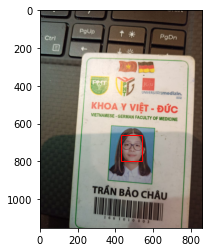

In [11]:
testDirect = "./Image/testSet/chau1.jpg"
test = pd.DataFrame(pipeline_function(testDirect).reshape(1,128))
drawAbox( Image.open(testDirect) ,extract_face(load_image_to_pixel(testDirect),True))


In [12]:
def EuclideanDistantClassifier(test,threhold):
  min =100
  identity = None
  dist = []
  for i in range(0,len(trainset)):
    current =  np.linalg.norm(trainset.iloc[i,:-1]-(test))
    dist.append(current)
    if (current < min):
      min = current
      identity = trainset.iloc[i,-1]
  
  if (min > threhold):
    return "unknown"
  else :
    return identity


EuclideanDistantClassifier(test,7)

'chau'

In [13]:
min =100
identity = None
dist = []
for i in range(0,len(trainset)):
  current =  np.linalg.norm(trainset.iloc[i,:-1]-(test))
  dist.append(current)
dist

[6.299860632508065,
 3.2271969856364615,
 7.077506896136109,
 10.275631478584286,
 6.419918599403715,
 9.553049557642202,
 6.891401751945272,
 7.672263536127938]